#### 🚗 Car Price Prediction – Data Analysis and Linear Regression

##### In this notebook, we analyze a dataset containing details of cars to uncover key insights and build a predictive model for estimating car prices. The process includes data cleaning, encoding categorical variables, exploratory data analysis (EDA), and applying Linear Regression to predict the selling price.


In [59]:
# import necessary libraries
import pandas as pd
import numpy as np
import category_encoders as ce
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [60]:
df = pd.read_csv('Car_Details.csv')


### 🗂 Dataset Overview

The dataset contains specifications of various car models from different manufacturers. Each row represents a unique car entry, with attributes such as engine size, horsepower, fuel efficiency, and physical dimensions. The target variable is **MSRP (Manufacturer’s Suggested Retail Price)**, which we aim to predict using the available features.

Key columns include:
- `Make`: Car manufacturer (e.g., Acura, BMW)
- `Type`: Vehicle category (SUV, Sedan, etc.)
- `EngineSize`, `Cylinders`, `Horsepower`: Engine-related specs
- `MPG_City`, `MPG_Highway`: Fuel efficiency in miles per gallon
- `Weight`, `Length`, `Wheelbase`: Physical attributes
- `MSRP`: Target variable representing the suggested retail price


In [61]:
df.head()

,Make,Type,Origin,DriveTrain,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,MSRP
0,Acura,SUV,Asia,All,3.5,6.0,265,17,23,4451,106,189,36945
1,Acura,Sedan,Asia,Front,2.0,4.0,200,24,31,2778,101,172,23820
2,Acura,Sedan,Asia,Front,2.4,4.0,200,22,29,3230,105,183,26990
3,Acura,Sedan,Asia,Front,3.2,6.0,270,20,28,3575,108,186,33195
4,Acura,Sedan,Asia,Front,3.5,6.0,225,18,24,3880,115,197,43755


In [62]:
# Handle the missing values
def handle_missing_values(df):
    print("Number of rows before handling missing values:", df.shape[0])
    
    # Fill missing values in numeric columns with the mean
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df[numeric_columns] = df[numeric_columns].fillna(df.mean(numeric_only=True))
    
    # Drop rows with missing values in categorical columns
    df.dropna(subset=['Type', 'Origin', 'DriveTrain'], inplace=True)

    return df
def perform_encoding(df):
    # Identify numerical columns and fill missing values with mean
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df = df.copy()
    df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

    # Identify and encode categorical columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    label_encoders = {}

    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

    return df.copy(), label_encoders

In [63]:
def plot_correlation_heatmap(df):
    corr_matrix = df.corr()
    plt.figure(figsize=(8, 6))
    plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
    plt.colorbar()
    plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation='vertical')
    plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
    plt.title("Correlation Heatmap")
    plt.show()

In [64]:
def build_linear_regression_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

In [65]:
#plotting the learning curve
def plot_learning_curve(estimator, X, y, cv=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='neg_mean_squared_error', shuffle=True
    )

    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training error')
    plt.plot(train_sizes, test_scores_mean, label='Validation error')
    plt.xlabel('Training Set Size')
    plt.ylabel('Mean Squared Error')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

Numeric columns: Index(['EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length', 'MSRP'],
      dtype='object')
Number of rows before handling missing values: 428
Number of rows before dropping missing values: 406


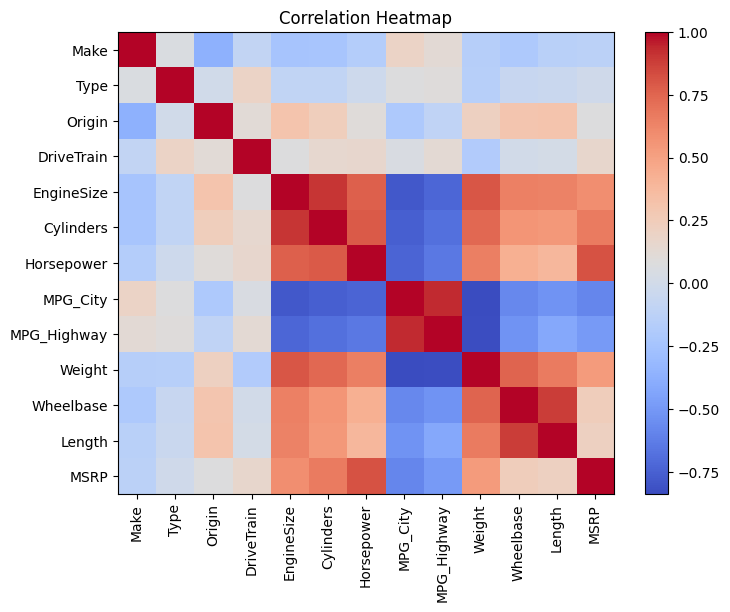

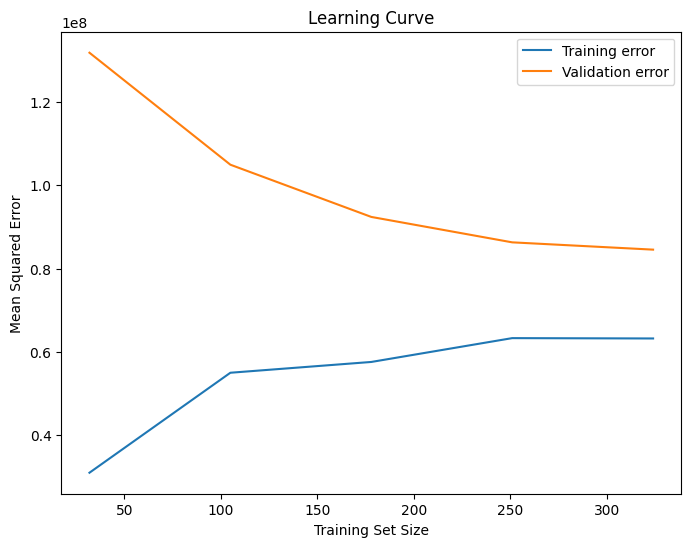

R-squared: 0.6267746317766418
MAE: 6831.37049315866
RMSE: 9369.130811299086


In [66]:
# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'R-squared: {r2}')
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')

# Load the dataset
file_path = "Car_Details_original.csv"

# Check the number of numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("Numeric columns:", numeric_cols)


# Handle missing values
df_imputed = handle_missing_values(df)

# Remove outliers using a z-score threshold of 3
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df_no_outliers = df[(z_scores < 3).all(axis=1)]

df_encoded, label_encoders = perform_encoding(df_no_outliers)

# Drop rows with missing values
print("Number of rows before dropping missing values:", df_encoded.shape[0])
df_no_missing = df_encoded.dropna()


# Identify categorical columns for encoding
categorical_cols = ['Type', 'Origin', 'DriveTrain']


# Plot correlation heatmap
plot_correlation_heatmap(df_encoded)

# Split the data into features (X) and target variable (y)
X = df_encoded.drop('MSRP', axis=1)
y = df_encoded['MSRP']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=52)

# Build and train the model
model = build_linear_regression_model(X_train, y_train)

# Plot the learning curve
plot_learning_curve(model, X, y, cv=5)

# Evaluate the model
evaluate_model(model, X_test, y_test)

### 🔍 Missing Values Overview

Before data cleaning, the dataset had **428 rows**, out of which **22 rows contained missing values**. These were removed, reducing the final dataset to **406 rows**.

Dropping rows with missing values ensures model performance is not affected by incomplete data, especially since the proportion of missing data was relatively small (~5%).

### 📈 Correlation Insights

The heatmap reveals several interesting relationships:
- `EngineSize`, `Cylinders`, and `Horsepower` show a **strong positive correlation** with `MSRP`, suggesting larger and more powerful engines tend to cost more.
- Fuel efficiency variables (`MPG_City` and `MPG_Highway`) have a **negative correlation** with `MSRP`, indicating higher-priced cars often have lower fuel economy.
- Variables like `Weight` and `Length` also contribute positively, though moderately, to the car's price.

### 📚 Model Learning Curve

The learning curve shows:
- **Training error** remains relatively stable.
- **Validation error** drops significantly with more data, then plateaus.

This implies:
- The model benefits from more data.
- There's **no overfitting**, but some **bias exists**, suggesting the model may not be capturing all complexities in the data.

### 📊 Model Evaluation Metrics

- **R-squared**: 0.627  
  Indicates the model explains ~63% of the variability in car prices — decent, but not highly accurate.
- **MAE (Mean Absolute Error)**: ~$6,831  
  On average, the model’s predictions are off by this amount.
- **RMSE (Root Mean Squared Error)**: ~$9,369  
  Penalizes larger errors more, indicating a few significant deviations.

Overall, the model performs moderately well, with room for improvement using more complex models or feature engineering.
